# What features do buildings advertise?

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from collections import Counter
nlp = spacy.load('en')

apts = pd.read_csv('ApartmentList_Cleaned.csv')

In [74]:
building_descriptions = apts.building_description.unique()
descriptions = ";".join(str(x) for x in building_descriptions).upper()

In [77]:
doc = nlp(descriptions)

In [84]:
# define dataset-specific stopwords
apt_stops = ['BEDROOM', 'BEDROOMS',
             'UNIT', 'HOME',
             'APARTMENT', 'APARTMENTS',
             ' ', '1', '2', '3', '\n']

# all tokens that arent stop words or punctuations
words = [token.text for token in doc if token.is_stop != True and 
         token.text not in apt_stops and
         token.is_punct != True]

# noun tokens that arent stop words or punctuations
nouns = [token.text for token in doc if token.is_stop != True and 
         token.text not in apt_stops and
         token.is_punct != True and 
         token.pos_ == "NOUN"]

# verb tokens that arent stop words or punctuations
verbs = [token.text for token in doc if token.is_stop != True and 
         token.text not in apt_stops and
         token.is_punct != True and 
         token.pos_ == "VERB"]

# adj tokens that arent stop words or punctuations
adjs = [token.text for token in doc if token.is_stop != True and 
         token.text not in apt_stops and
         token.is_punct != True and 
         token.pos_ == "ADJ"]

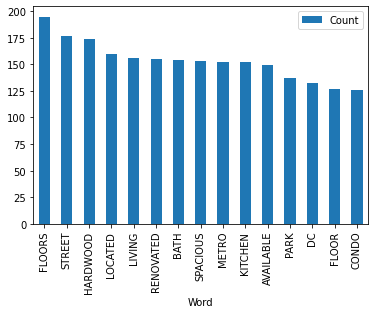

In [104]:
# fifteen most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(15)
df = pd.DataFrame(common_words, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

AxesSubplot(0.125,0.125;0.775x0.755)


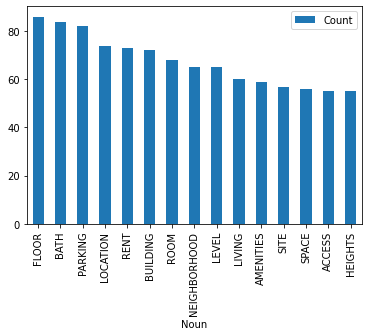

In [97]:
# fifteen most common noun tokens
noun_freq = Counter(nouns)
common_nouns = noun_freq.most_common(15)
df = pd.DataFrame(common_nouns, columns = ['Noun', 'Count'])
df.plot.bar(x='Noun',y='Count')

AxesSubplot(0.125,0.125;0.775x0.755)


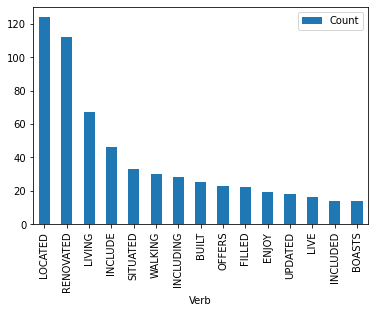

In [96]:
# fifteen most common verb tokens
verb_freq = Counter(verbs)
common_verbs = verb_freq.most_common(15)
df = pd.DataFrame(common_verbs, columns = ['Verb', 'Count'])
df.plot.bar(x='Verb',y='Count')

AxesSubplot(0.125,0.125;0.775x0.755)


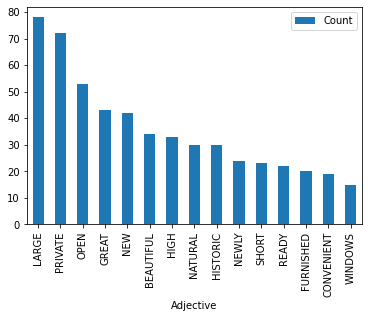

In [95]:
# fifteen most common verb tokens
adj_freq = Counter(adjs)
common_adjs = adj_freq.most_common(15)
df = pd.DataFrame(common_adjs, columns = ['Adjective', 'Count'])
df.plot.bar(x='Adjective',y='Count')